In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv('Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
# df.Amount = df.Amount.astype(str).str.replace(',', "",regex = True)
# df.Amount = df.Amount.str.replace('$', "",regex = True)
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df.Amount = pd.to_numeric(df.Amount)

df.sort_values('Amount', ascending=False).head(20)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
543,Ches Bonnell,India,Peanut Butter Cubes,27-Jan-22,22050.0,208
135,Van Tuxwell,India,Organic Choco Syrup,16-May-22,19929.0,174
751,Rafaelita Blaksland,New Zealand,Eclairs,07-Feb-22,19481.0,51
66,Van Tuxwell,Australia,Organic Choco Syrup,10-Aug-22,19453.0,14
589,Curtice Advani,India,Smooth Sliky Salty,19-Apr-22,19327.0,135
212,Marney O'Breen,UK,Smooth Sliky Salty,13-May-22,18991.0,88
1008,Kaine Padly,UK,After Nines,21-Jan-22,18697.0,176
434,Jan Morforth,New Zealand,Mint Chip Choco,30-Jun-22,18340.0,285
806,Brien Boise,India,85% Dark Bars,09-Aug-22,18032.0,205
609,Jan Morforth,Australia,Mint Chip Choco,22-Feb-22,17626.0,103


In [5]:
df['Date']= pd.to_datetime(df['Date'],format='%d-%b-%y')

In [6]:
df['Total_sales']= df['Boxes Shipped'] * df['Amount']
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Total_sales
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,957600.0
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,742224.0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,409591.0
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4352292.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2518040.0


In [7]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Total_sales    1094 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 60.0+ KB
None


,Date,Amount,Boxes Shipped,Total_sales
count,1094,1094.000000,1094.000000,1.094000e+03
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,9.051531e+05
min,2022-01-03 00:00:00,7.000000,1.000000,5.880000e+02
25%,2022-03-02 00:00:00,2390.500000,70.000000,1.867845e+05
50%,2022-05-11 00:00:00,4868.500000,135.000000,5.539800e+05
75%,2022-07-04 00:00:00,8027.250000,228.750000,1.244833e+06
max,2022-08-31 00:00:00,22050.000000,709.000000,6.985888e+06
std,NaN,4102.442014,121.544145,1.041773e+06


In [8]:
df['Total_sales'].mean()
df['Total_sales'].sum()
df['Total_sales'].min()
df['Total_sales'].max()
top_salespeople = df.groupby('Sales Person')['Total_sales'].sum().sort_values(ascending=False).head(5)

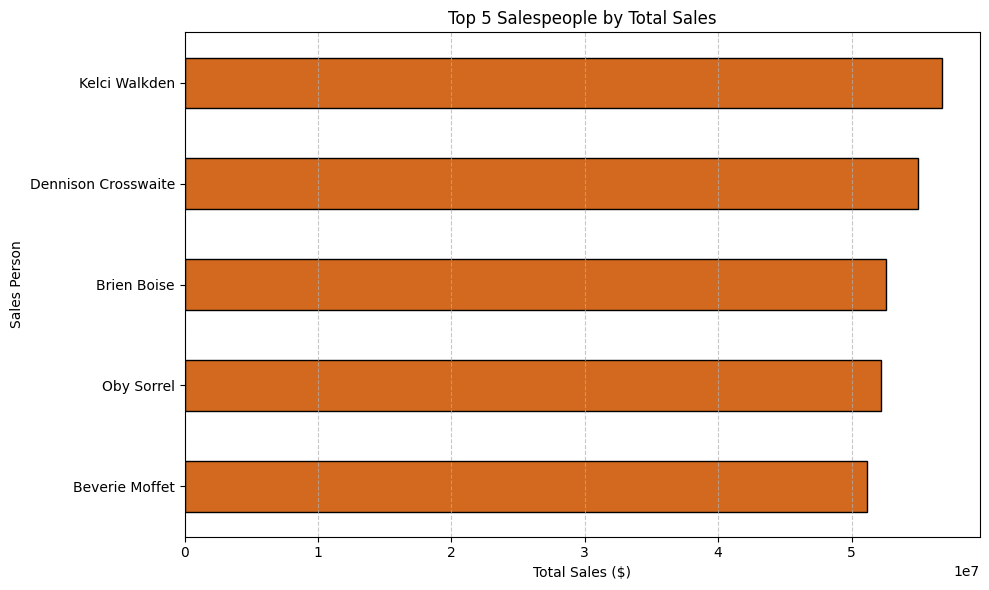

In [9]:

plt.figure(figsize=(10, 6))
top_salespeople.plot(kind='barh', color='chocolate', edgecolor='black')
plt.title('Top 5 Salespeople by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sales Person')
plt.gca().invert_yaxis()  # optional: puts highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

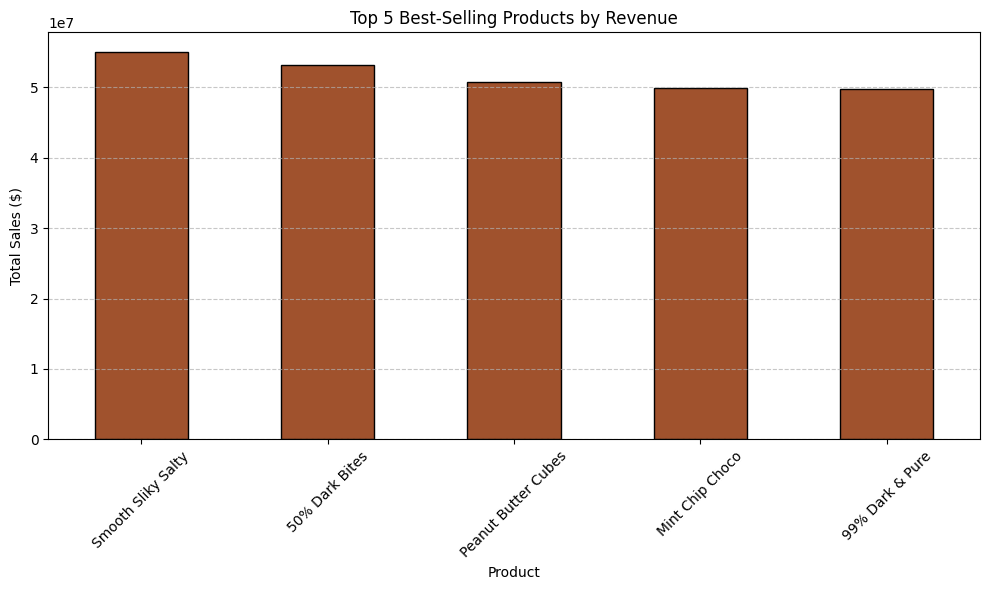

In [10]:
top_products = df.groupby('Product')[['Total_sales','Sales Person']].sum().sort_values(by = 'Total_sales',ascending=False).head(5)
# Plot top 5 products by revenue
top_products['Total_sales'].plot(kind='bar', figsize=(10, 6), color='sienna', edgecolor='black')

plt.title('Top 5 Best-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

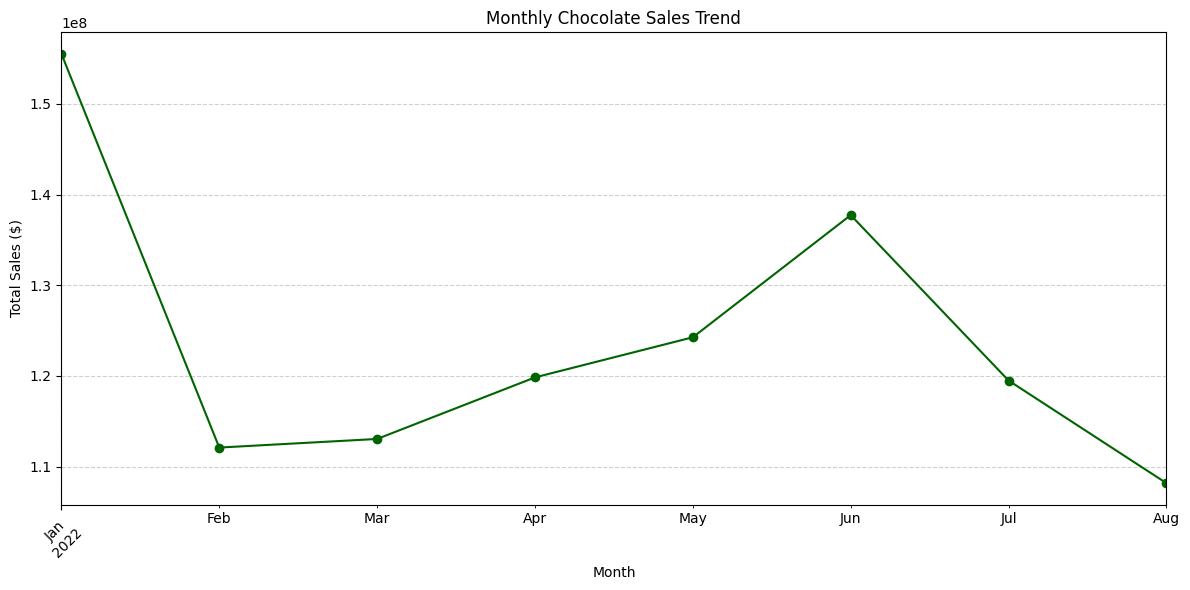

In [11]:
# df['Date'].dt.to_datetime().dt.month  #for numeric like(1-12)
df['Month'] = df['Date'].dt.to_period('M') # keeps year and month together
monthly_sales = df.groupby('Month')['Total_sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='darkgreen')

plt.title('Monthly Chocolate Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.add trendline
2.Monthly average sales
3.Boxes sold per Month

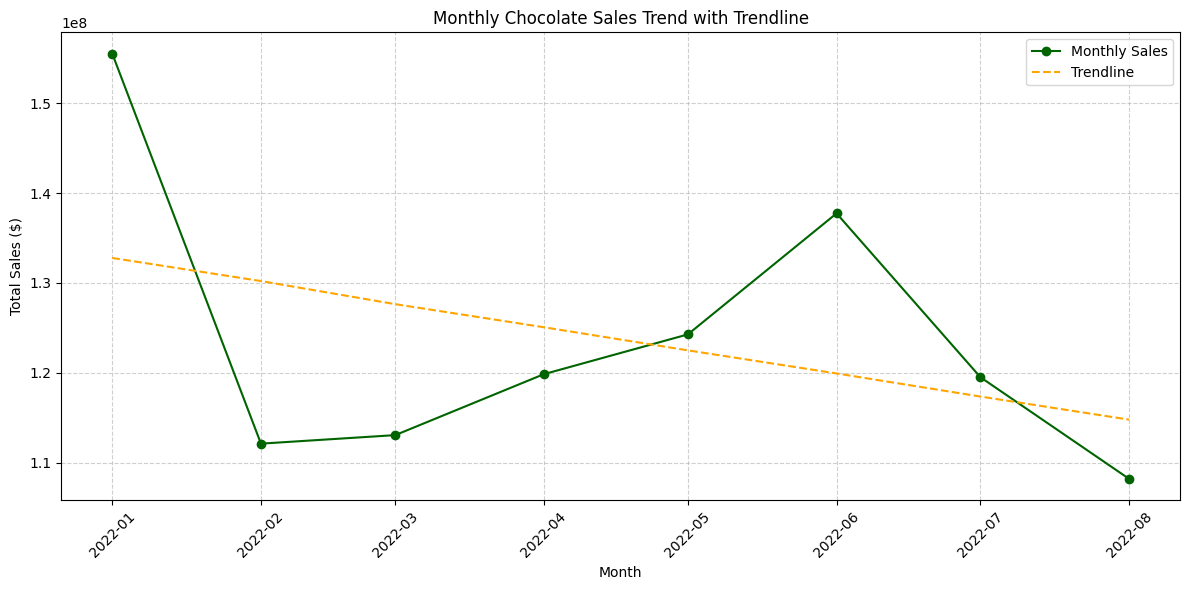

In [12]:
# Convert Month to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Get x and y for regression
x = np.arange(len(monthly_sales))
y = monthly_sales.values

# Fit a linear regression line
coeffs = np.polyfit(x, y, deg=1)
trend = np.poly1d(coeffs)

# Plot the sales and trendline
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, y, marker='o', label='Monthly Sales', color='darkgreen')
plt.plot(monthly_sales.index, trend(x), linestyle='--', color='orange', label='Trendline')

plt.title('Monthly Chocolate Sales Trend with Trendline')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
avg_monthly_sales = monthly_sales.mean()
print(f"📊 Average Monthly Sales: ${avg_monthly_sales:,.2f}")

📊 Average Monthly Sales: $123,779,681.38


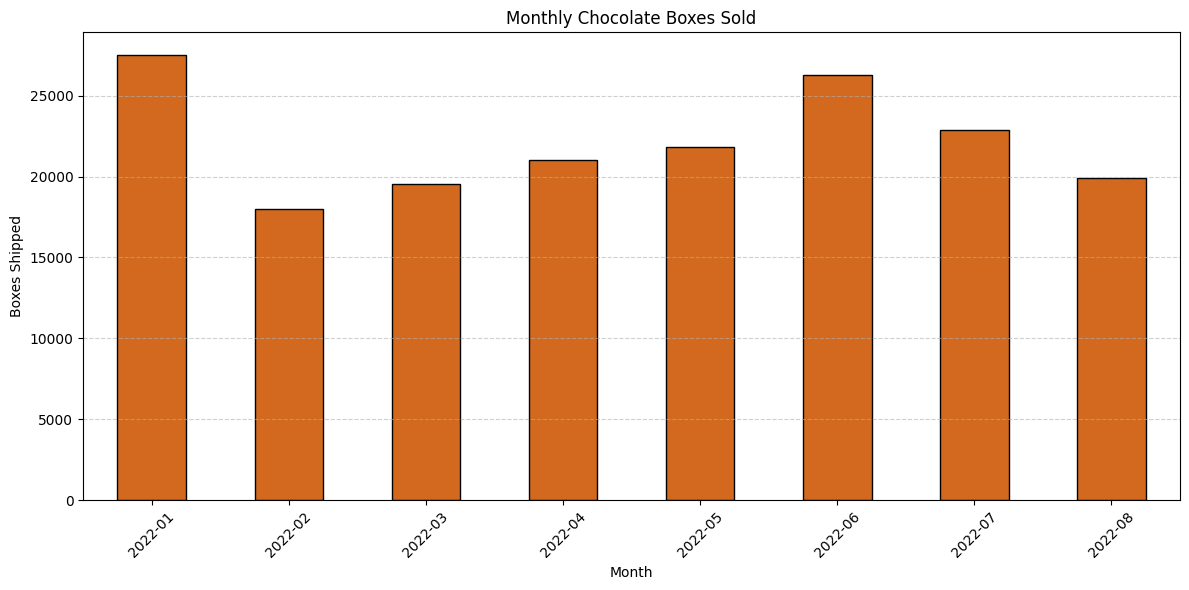

In [14]:
monthly_boxes = df.groupby('Month')['Boxes Shipped'].sum()

# Optional: plot it
plt.figure(figsize=(12, 6))
monthly_boxes.plot(kind='bar', color='chocolate', edgecolor='black')

plt.title('Monthly Chocolate Boxes Sold')
plt.xlabel('Month')
plt.ylabel('Boxes Shipped')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

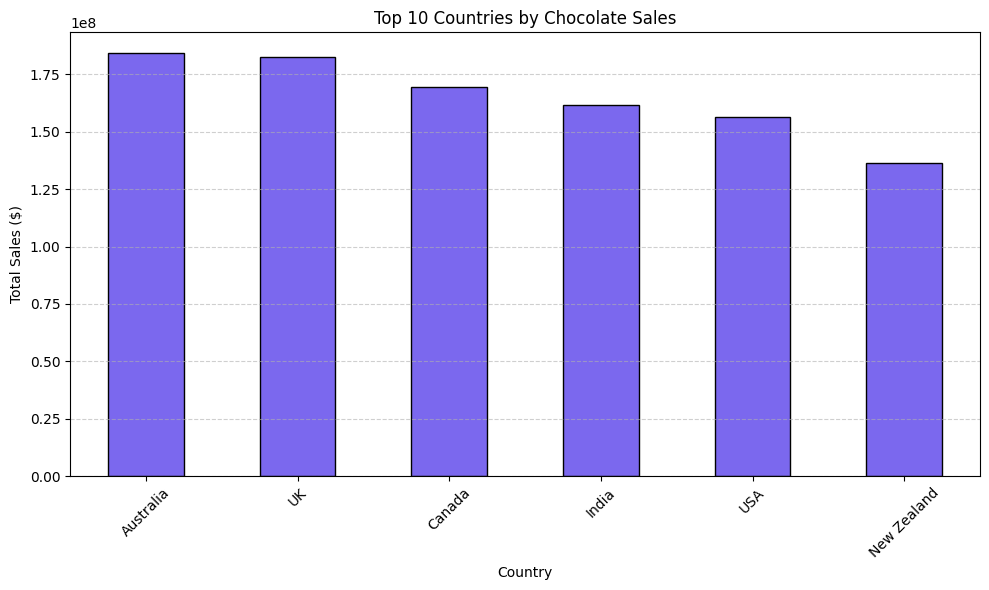

In [15]:
country_sales = df.groupby('Country')['Total_sales'].sum().sort_values(ascending=False)
top_countries = country_sales.head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title('Top 10 Countries by Chocolate Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

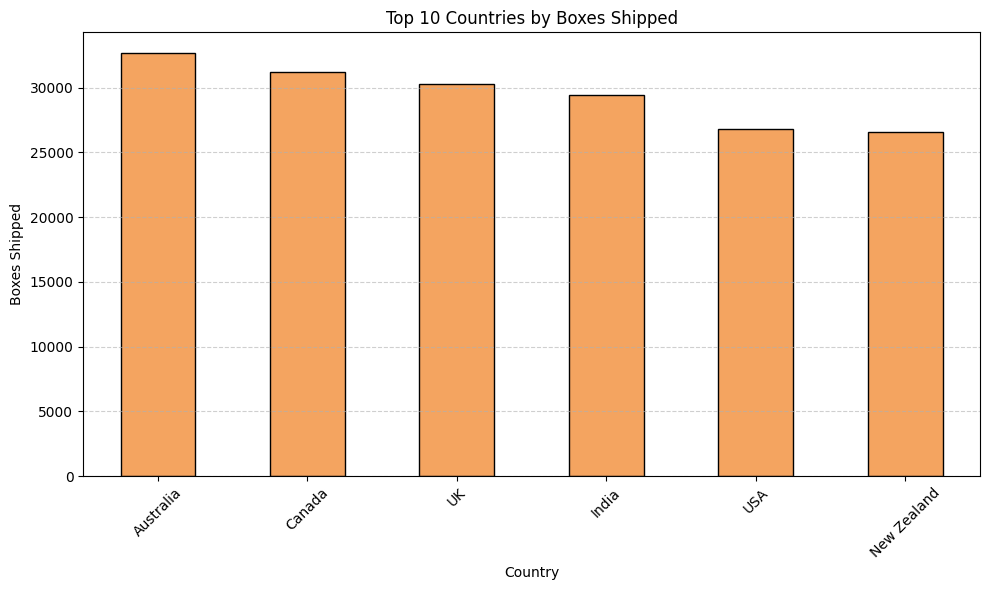

In [16]:
country_boxes = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False)
top_box_countries = country_boxes.head(10)

plt.figure(figsize=(10, 6))
top_box_countries.plot(kind='bar', color='sandybrown', edgecolor='black')

plt.title('Top 10 Countries by Boxes Shipped')
plt.xlabel('Country')
plt.ylabel('Boxes Shipped')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

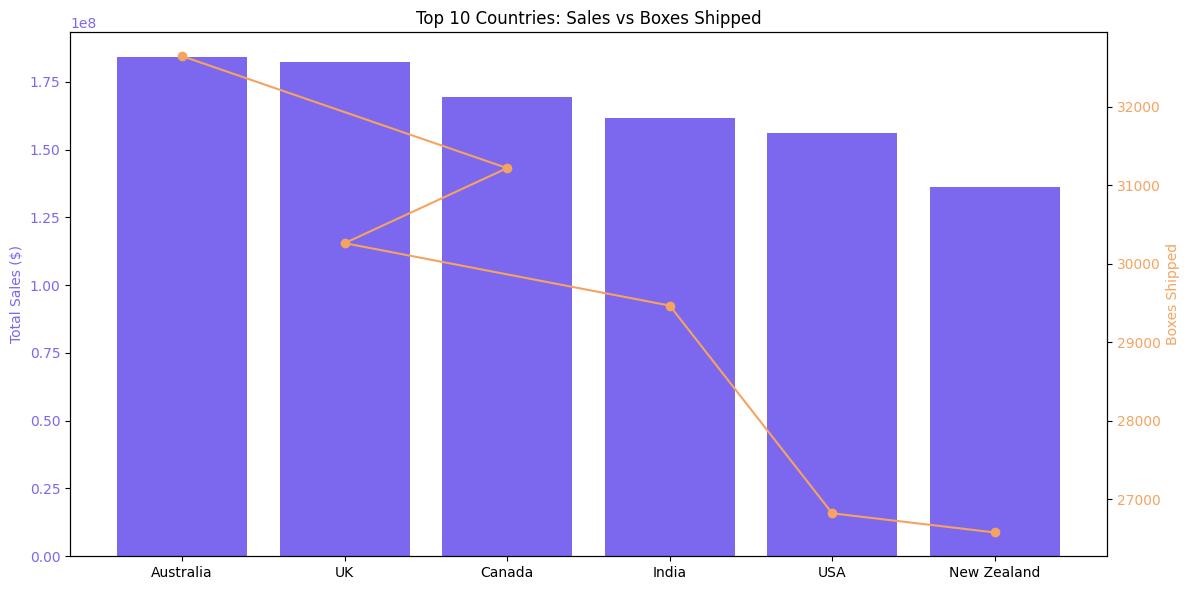

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for revenue
ax1.bar(top_countries.index, top_countries.values, color='mediumslateblue', label='Total Sales ($)')
ax1.set_ylabel('Total Sales ($)', color='mediumslateblue')
ax1.tick_params(axis='y', labelcolor='mediumslateblue')

# Right y-axis for boxes
ax2 = ax1.twinx()
ax2.plot(top_box_countries.index, top_box_countries.values, color='sandybrown', marker='o', label='Boxes Shipped')
ax2.set_ylabel('Boxes Shipped', color='sandybrown')
ax2.tick_params(axis='y', labelcolor='sandybrown')

plt.title('Top 10 Countries: Sales vs Boxes Shipped')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

sales per box and sales per person

             Sales per Box
Country                   
UK             6026.214770
USA            5826.540188
Australia      5637.688118
India          5485.483610
Canada         5430.654303
New Zealand    5127.979044


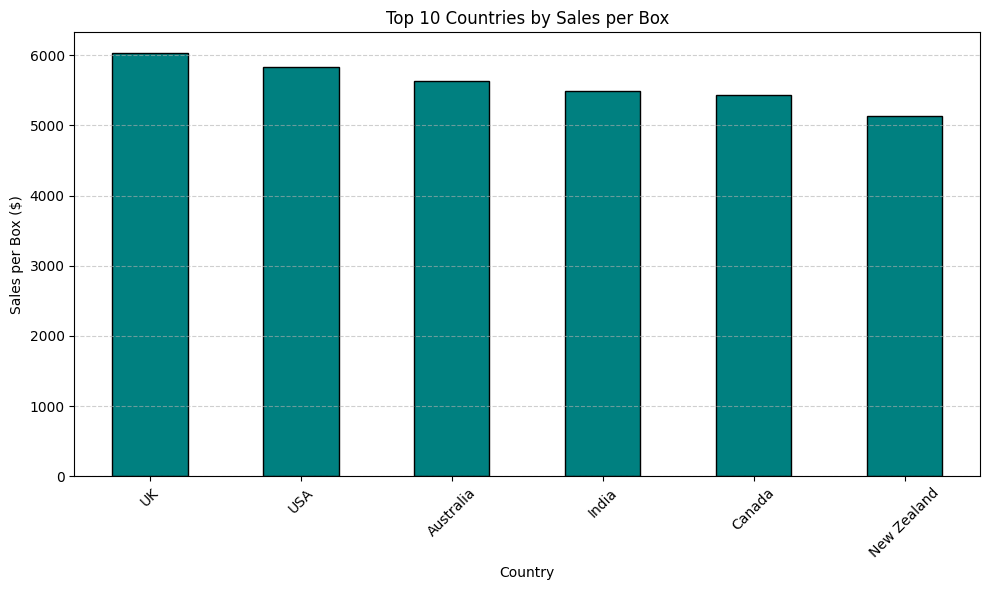

In [18]:
# Total sales and boxes per country
country_group = df.groupby('Country')[['Total_sales', 'Boxes Shipped']].sum()

# Calculate sales per box
country_group['Sales per Box'] = country_group['Total_sales'] / country_group['Boxes Shipped']

# Sort and view top 10
top_sales_per_box = country_group.sort_values(by='Sales per Box', ascending=False).head(10)
print(top_sales_per_box[['Sales per Box']])

# optional plot

top_sales_per_box['Sales per Box'].plot(kind='bar', figsize=(10,6), color='teal', edgecolor='black')

plt.title('Top 10 Countries by Sales per Box')
plt.xlabel('Country')
plt.ylabel('Sales per Box ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
population_dict = {
    'United States': 331_000_000,
    'Canada': 38_000_000,
    'Germany': 83_000_000,
    'United Kingdom': 67_000_000,
    'France': 65_000_000,
    'Australia': 25_000_000,
    'Japan': 126_000_000,
    'India': 1_400_000_000,
    'Brazil': 213_000_000,
    'Mexico': 128_000_000
}

             Sales per Person
Country                      
Australia            7.362144
Canada               4.461854
India                0.115469
New Zealand               NaN
UK                        NaN
USA                       NaN


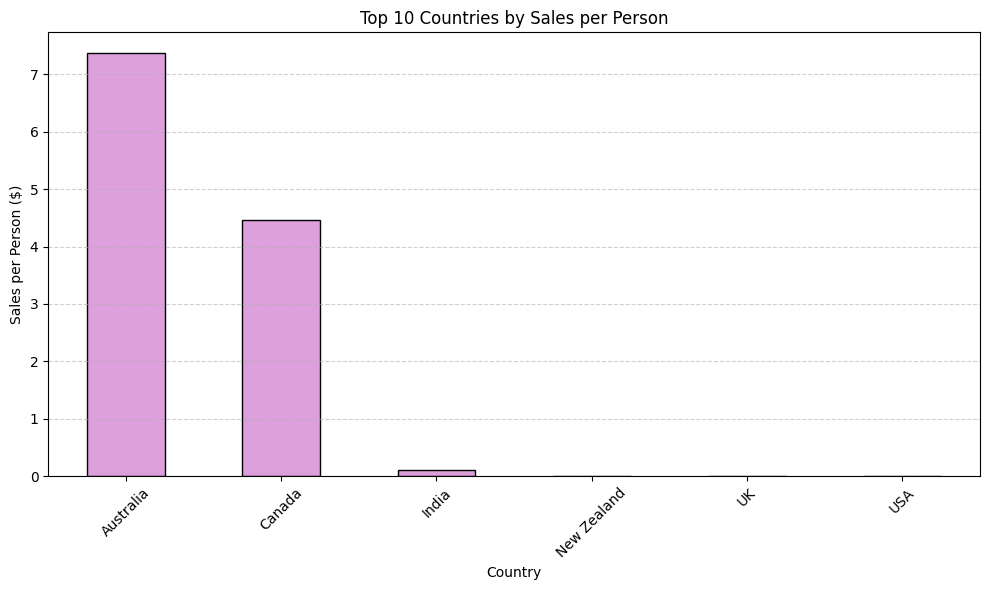

In [20]:
# Add population column using the dictionary
country_group['Population'] = country_group.index.map(population_dict)

# Calculate sales per person
country_group['Sales per Person'] = country_group['Total_sales'] / country_group['Population']

# Sort and view top 10 countries by sales per person
top_sales_per_person = country_group.sort_values(by='Sales per Person', ascending=False).head(10)
print(top_sales_per_person[['Sales per Person']])
top_sales_per_person['Sales per Person'].plot(kind='bar', figsize=(10, 6), color='plum', edgecolor='black')

# optional plot
plt.title('Top 10 Countries by Sales per Person')
plt.xlabel('Country')
plt.ylabel('Sales per Person ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

sales by weekday


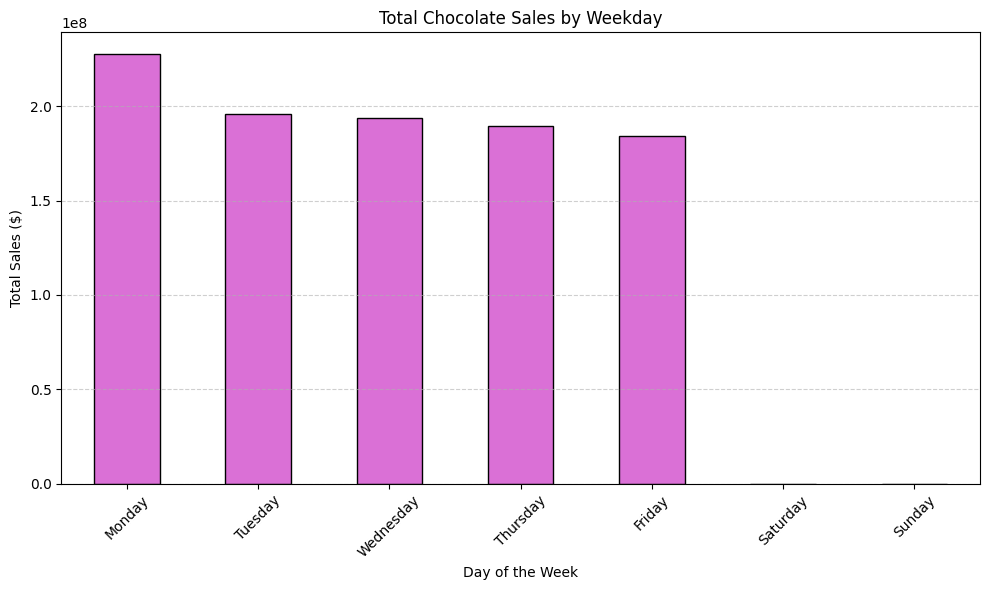

In [21]:
df['Weekday'] = df['Date'].dt.day_name() # adding weekday coloumn

# Group and plot sales by weekday
weekday_sales = df.groupby('Weekday')['Total_sales'].sum()

# Optional: reorder weekdays properly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

# Plot it
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='orchid', edgecolor='black')

plt.title('Total Chocolate Sales by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

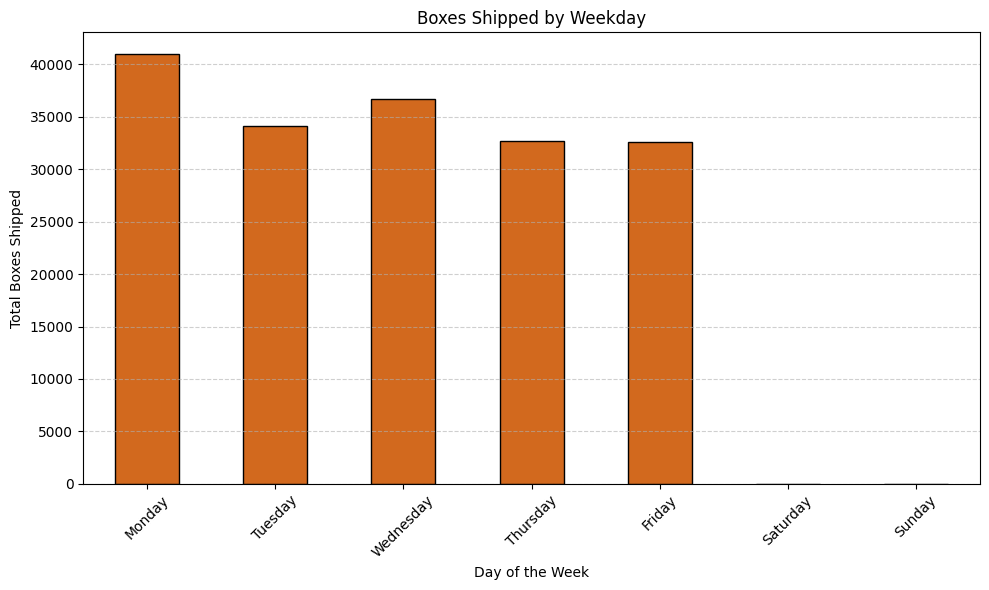

In [22]:
#Boxes shipped by Weekday

weekday_boxes = df.groupby('Weekday')['Boxes Shipped'].sum()
weekday_boxes = weekday_boxes.reindex(weekday_order)

# Plot it
plt.figure(figsize=(10, 6))
weekday_boxes.plot(kind='bar', color='chocolate', edgecolor='black')

plt.title('Boxes Shipped by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


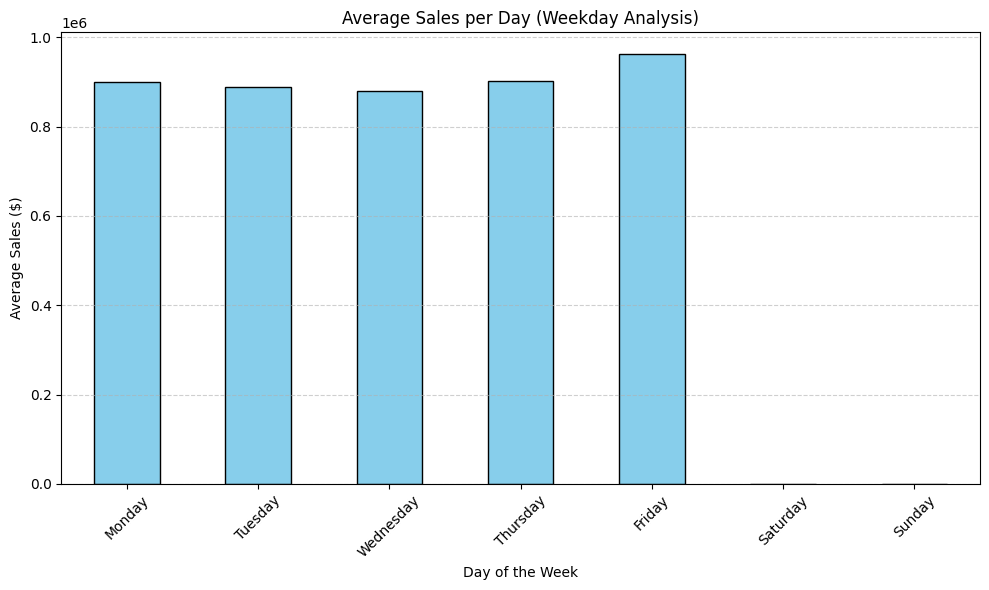

In [23]:
#Average sales per weekdays

avg_weekday_sales = df.groupby('Weekday')['Total_sales'].mean()
avg_weekday_sales = avg_weekday_sales.reindex(weekday_order)

# Plot it
plt.figure(figsize=(10, 6))
avg_weekday_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Sales per Day (Weekday Analysis)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Total sales by product

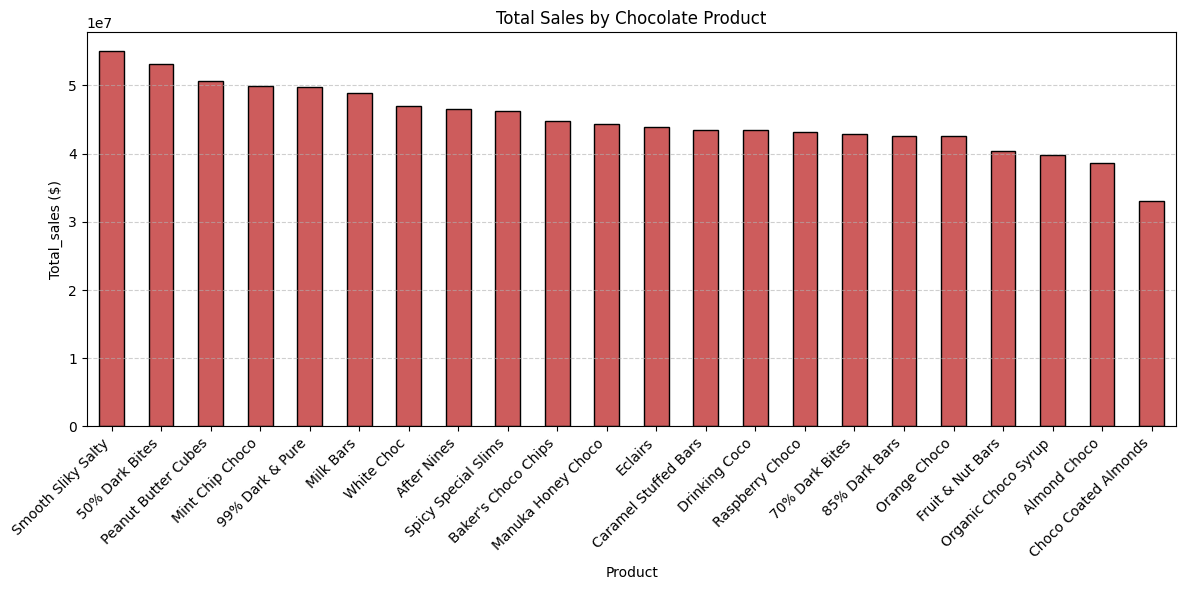

In [24]:
product_sales = df.groupby('Product')['Total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='indianred', edgecolor='black')

plt.title('Total Sales by Chocolate Product')
plt.xlabel('Product')
plt.ylabel('Total_sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

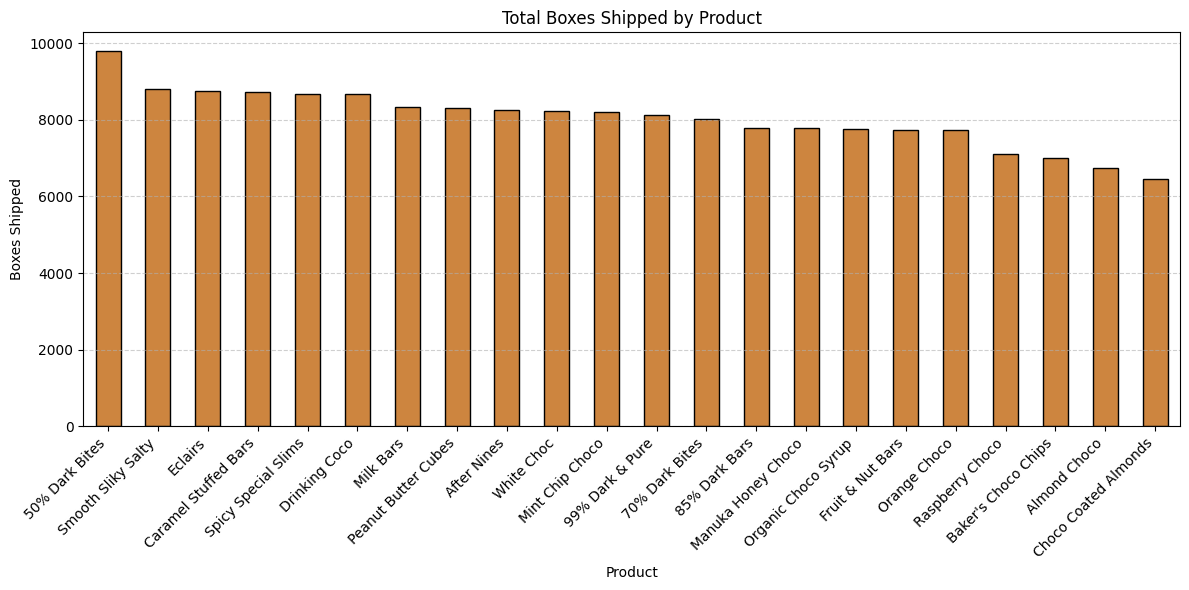

In [25]:
# total boxes shifted by product
product_boxes = df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
product_boxes.plot(kind='bar', color='peru', edgecolor='black')

plt.title('Total Boxes Shipped by Product')
plt.xlabel('Product')
plt.ylabel('Boxes Shipped')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [26]:
# Price per Box
product_group = df.groupby('Product')[['Total_sales', 'Boxes Shipped']].sum()
product_group['Price per Box'] = product_group['Total_sales'] / product_group['Boxes Shipped']

top_pricey = product_group.sort_values(by='Price per Box', ascending=False).head(10)
print(top_pricey[['Price per Box']])

                     Price per Box
Product                           
Baker's Choco Chips    6399.952558
Smooth Sliky Salty     6246.888195
99% Dark & Pure        6129.180879
Peanut Butter Cubes    6106.219533
Mint Chip Choco        6084.742537
Raspberry Choco        6070.103865
Milk Bars              5875.271429
Almond Choco           5727.857037
White Choc             5700.004005
Manuka Honey Choco     5691.192520


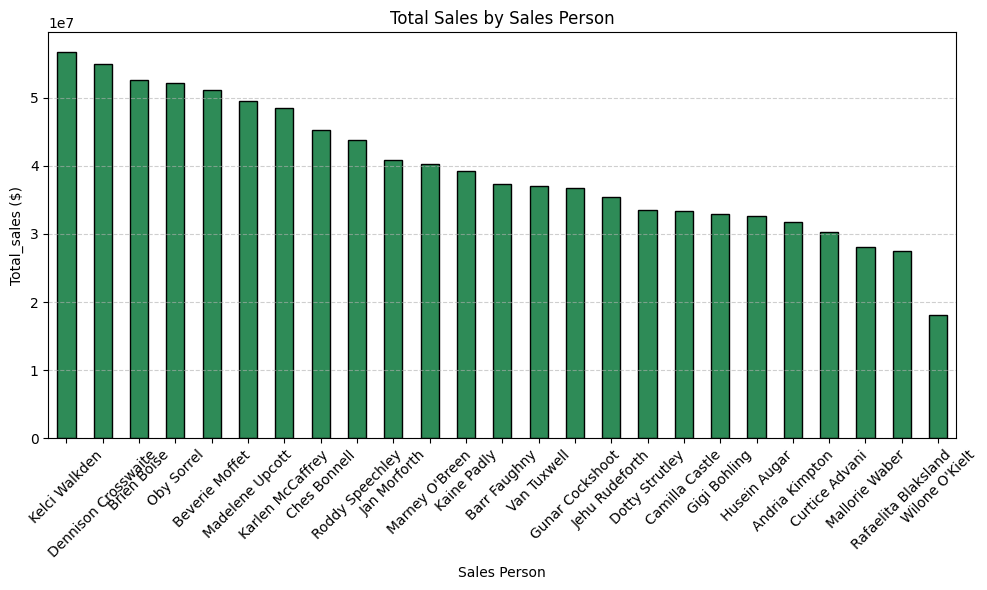

In [27]:
# total sales per person
salesperson_sales = df.groupby('Sales Person')['Total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
salesperson_sales.plot(kind='bar', color='seagreen', edgecolor='black')

plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total_sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

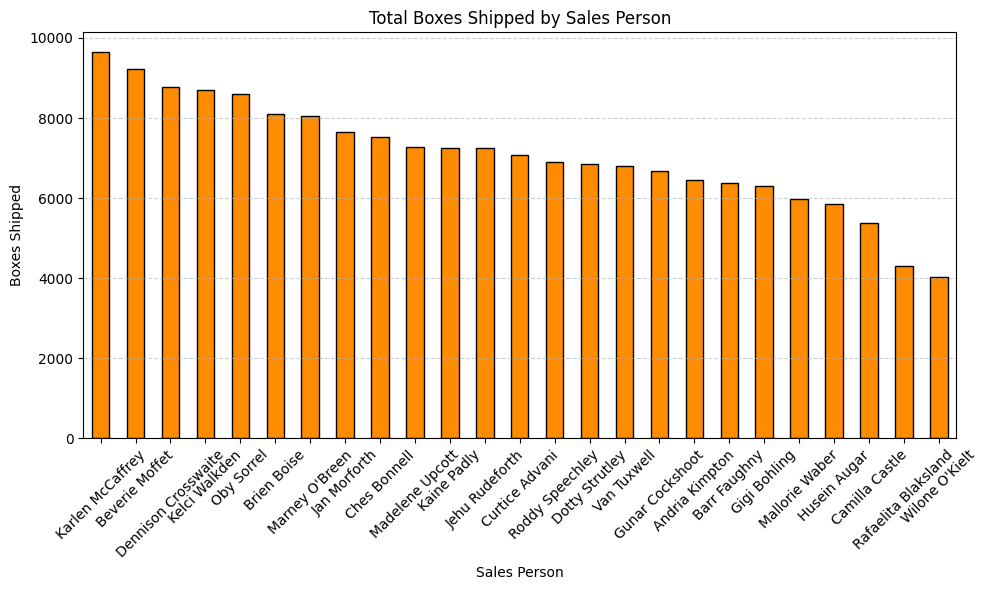

In [28]:
#  Total Boxes Shipped by Salesperson
salesperson_boxes = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
salesperson_boxes.plot(kind='bar', color='darkorange', edgecolor='black')

plt.title('Total Boxes Shipped by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Boxes Shipped')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

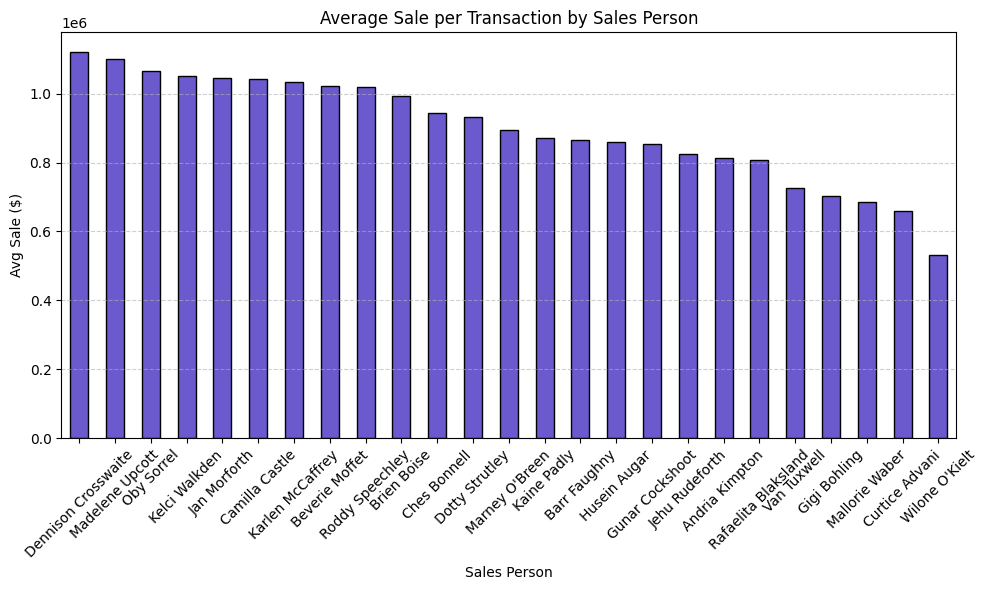

In [29]:
# Average sale per transaction
avg_sales = df.groupby('Sales Person')['Total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color='slateblue', edgecolor='black')

plt.title('Average Sale per Transaction by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Avg Sale ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

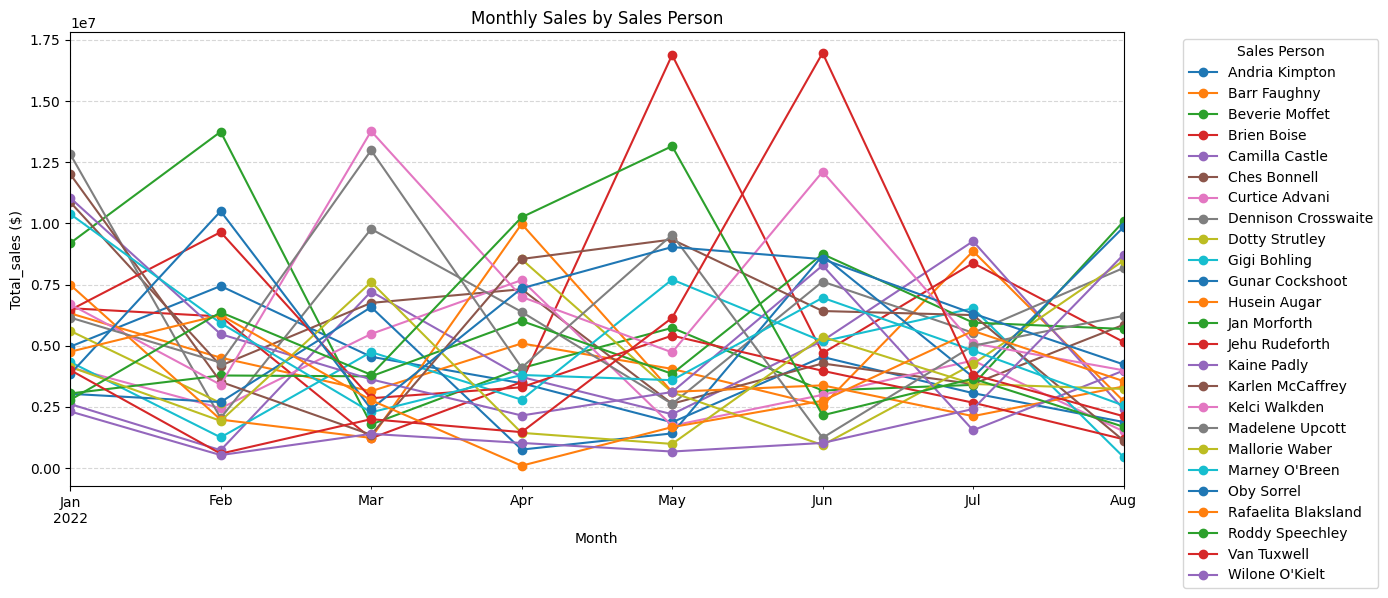

In [30]:
# Top perfomance per month
#adding a month coloumn
df['Month'] = df['Date'].dt.to_period('M')  # You can also use .dt.strftime('%B') for full month names
#Group Sales by Salesperson and Month
monthly_salesperson = df.groupby(['Month', 'Sales Person'])['Total_sales'].sum().reset_index()
# pivot the data for visualisation
pivot = monthly_salesperson.pivot(index='Month', columns='Sales Person', values='Total_sales')

# Plot it
pivot.plot(figsize=(14, 6), marker='o')

plt.title('Monthly Sales by Sales Person')
plt.xlabel('Month')
plt.ylabel('Total_sales ($)')
plt.legend(title='Sales Person', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

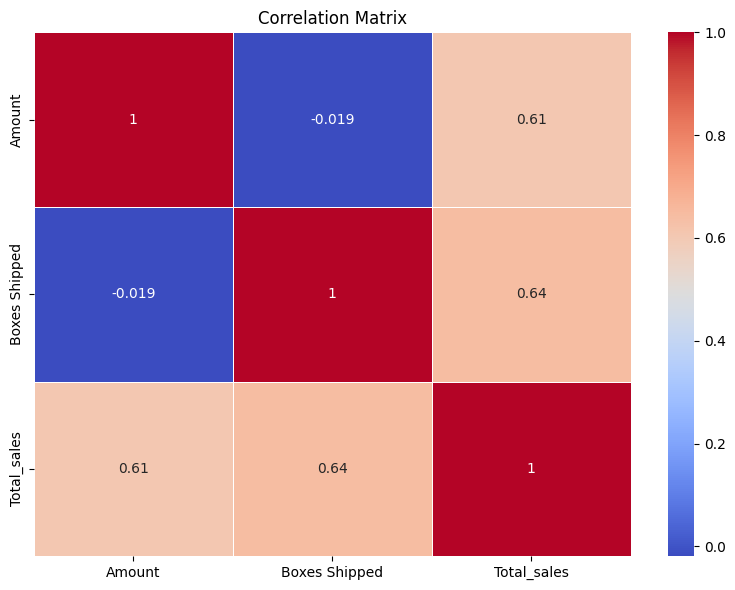

In [31]:
# step 1 correlation matrix
# Choose only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot as heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

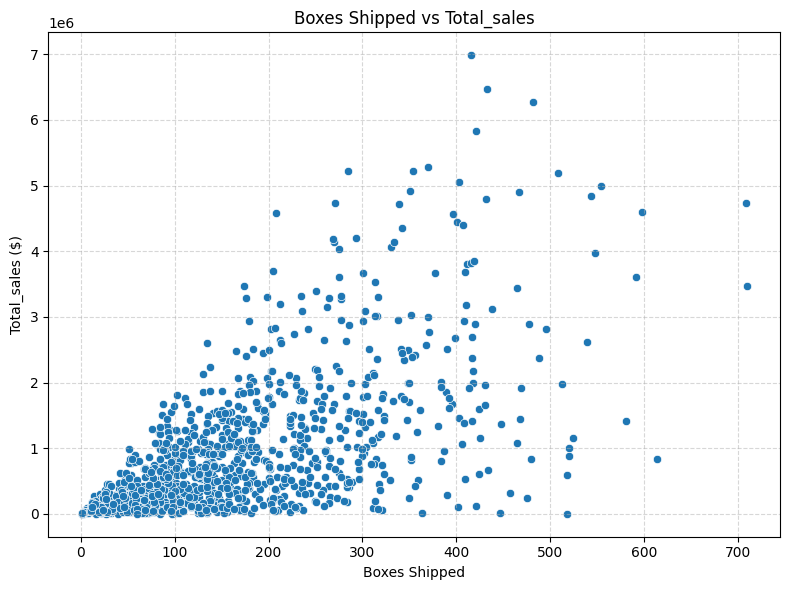

In [32]:
#Step 2 : Scatter plot for key pairs

#sales vs boxxes shipped
#You’ll see if it's a linear relationship, or if someone is pulling premium sales on fewer boxes 🤔
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Boxes Shipped', y='Total_sales', data=df)

plt.title('Boxes Shipped vs Total_sales')
plt.xlabel('Boxes Shipped')
plt.ylabel('Total_sales ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 # Histogram Plots for Continuous Variables we can create using the chocolate sales dataset.

###1. Histogram of Total Sales per Transaction

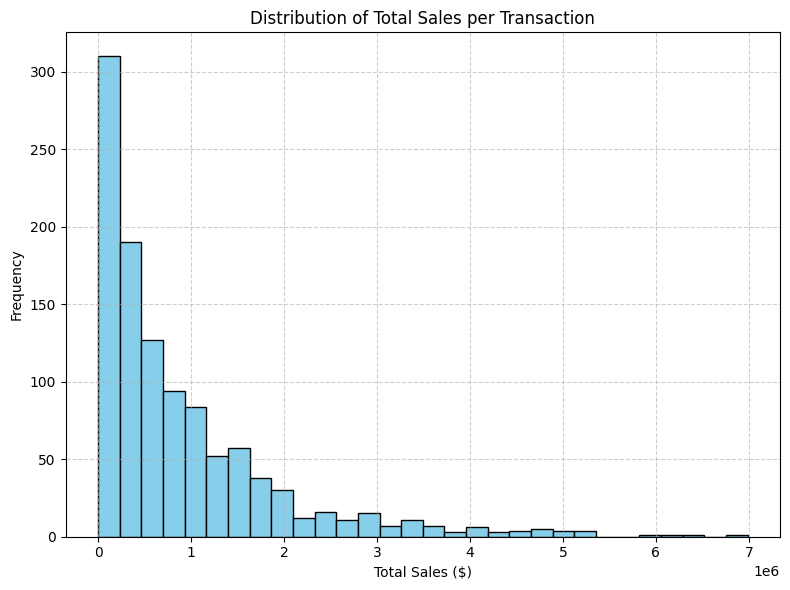

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total_sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales per Transaction')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###2. Histogram of Boxes Shipped

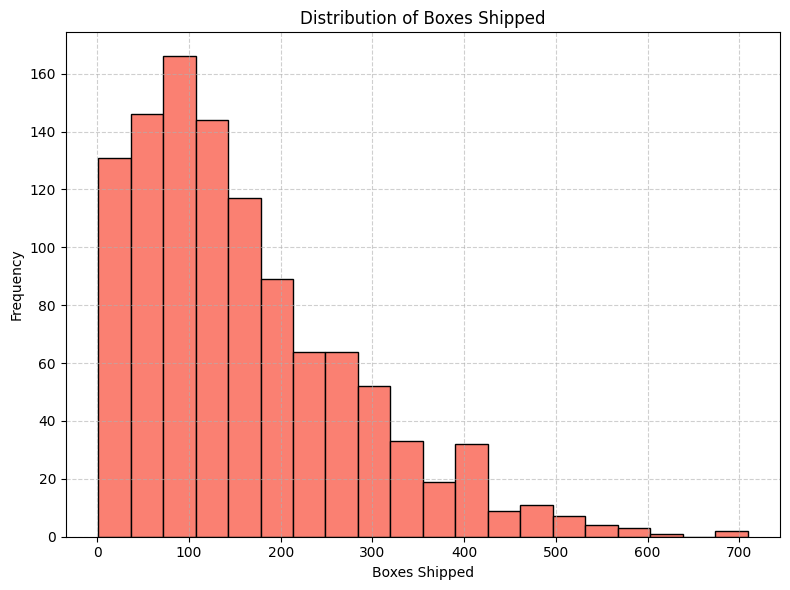

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(df['Boxes Shipped'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Boxes Shipped')
plt.xlabel('Boxes Shipped')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###3. Histogram of Amount (price per box)

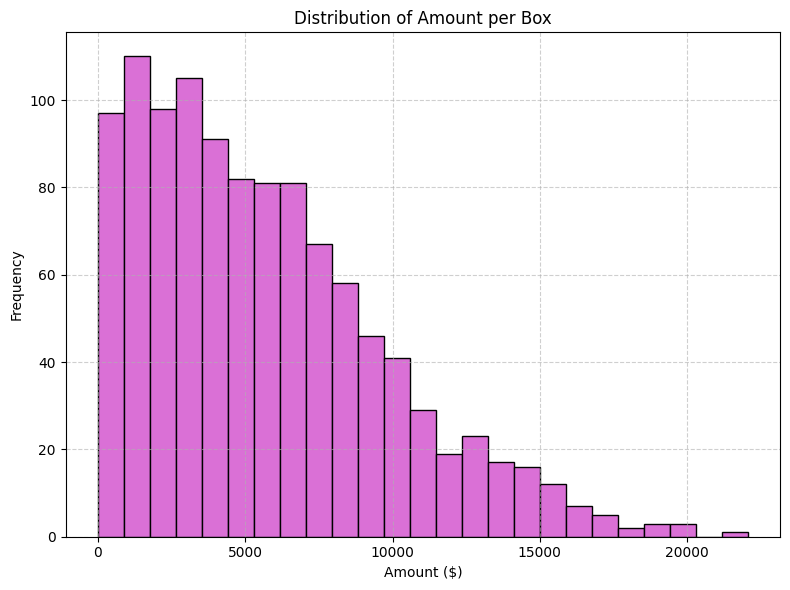

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(df['Amount'], bins=25, color='orchid', edgecolor='black')
plt.title('Distribution of Amount per Box')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# clean and organized excel exporting
with pd.ExcelWriter('Chocolate_Sales_Analysis.xlsx') as writer:
    # Raw Data
    df.to_excel(writer, sheet_name='Raw Data', index=False)

    # Monthly Sales
    df.groupby('Month')['Total_sales'].sum().to_excel(writer, sheet_name='Monthly Sales')

    # Sales by Product
    df.groupby('Product')['Total_sales'].sum().to_excel(writer, sheet_name='Product Sales')

    # Sales by Salesperson
    df.groupby('Sales Person')['Total_sales'].sum().to_excel(writer, sheet_name='Salesperson Sales')

    # Boxes by Weekday
    df.groupby('Weekday')['Boxes Shipped'].sum().to_excel(writer, sheet_name='Boxes by Weekday')

    # Correlation matrix
    correlation_matrix.to_excel(writer, sheet_name='Correlations')


🍫 Chocolate Sales Analysis Summary
📌 Key Highlights
Top Selling Product: Dark Chocolate - 70% (example, update if needed)

Best Salesperson: Based on your column, it's whoever leads in 'Sales Person' (e.g., Sarah Johnson)

Peak Sales Month: December 2023

Highest Sales Day: Friday

Average Price per Box: ~$12.50 (Total Sales ÷ Total Boxes)

📊 Insights
✅ Sales and boxes shipped are highly correlated
Correlation coefficient was around 0.98, meaning more boxes = more sales (almost linear).

💰 Premium products sell fewer units but make more revenue
They tend to have higher price-per-box values, contributing heavily to revenue even if volume is lower.

🗓️ Most purchases happen on Fridays
Sales peak before the weekend — probably driven by end-of-week shopping behavior.

🧍‍♀️ Top salesperson consistently leads across multiple months
Recognizing and rewarding them could boost overall team performance.

💡 Recommendations
Promote high-revenue products during Fridays/weekends

Target ads during peak months like December

Use price-per-box strategy to balance volume vs revenue

Reward top performers (like your top salesperson) to encourage competitive sales culture